In [280]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
unencoded=pd.read_csv('Datasets/cleaned_dataset1_unencoded.csv')
encoded=pd.read_csv('Datasets/cleaned_dataset1_encoded.csv')

In [282]:
unencoded.head()

,customerid,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,...,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,3.319219,6.528604,GT Bank,NaN,NaN,1.0,10000.0,11500.0,15.0,...,13000.0,30.0,Good,50,False,False,True,15.0,1.018611,15 days 00:04:10
1,8a858e275c7ea5ec015c82482d7c3996,3.325598,7.119403,Sterling Bank,Permanent,NaN,1.0,10000.0,13000.0,30.0,...,13000.0,30.0,Bad,38,False,False,True,32.0,1.018889,32 days 19:55:14
2,8a858e5b5bd99460015bdc95cd485634,5.746100,5.563174,Fidelity Bank,NaN,NaN,3.0,30000.0,36000.0,20.0,...,13000.0,30.0,Good,37,False,False,True,32.0,1.001944,32 days 22:12:37
3,8a858efd5ca70688015cabd1f1e94b55,3.362850,6.642485,GT Bank,Permanent,NaN,1.0,10000.0,11500.0,15.0,...,11500.0,15.0,Good,32,False,False,True,33.0,1.018889,33 days 05:08:39
4,8a858e785acd3412015acd48f4920d04,8.455332,11.971410,GT Bank,Permanent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,41,False,False,True,NaN,NaN,NaN


In [283]:
# labeling of level_of_education_clients
unencoded['level_of_education_clients'] = unencoded['level_of_education_clients'].map({'Primary':1,'Secondary':2,'Graduate':3,'Post-Graduate':4})

In [284]:
#breaking down of the last_approveddate field
unencoded['last_approveddate_date']=unencoded['last_approveddate'].str.split('/').str[0]
unencoded['last_approveddate_month']=unencoded['last_approveddate'].str.split('/').str[1]
unencoded['last_approveddate_year']=unencoded['last_approveddate'].str.split('/').str[2].str.split(' ').str[0]
unencoded['last_approveddate_hour']=unencoded['last_approveddate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0]
unencoded['last_approveddate_min']=unencoded['last_approveddate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1]

In [285]:
unencoded.drop('last_approveddate', axis=1, inplace=True)

In [286]:
#breaking down of the last_creationdate field
unencoded['last_creationdate_date']=unencoded['last_creationdate'].str.split('/').str[0]
unencoded['last_creationdate_month']=unencoded['last_creationdate'].str.split('/').str[1]
unencoded['last_creationdate_year']=unencoded['last_creationdate'].str.split('/').str[2].str.split(' ').str[0]
unencoded['last_creationdate_hour']=unencoded['last_creationdate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0]
unencoded['last_creationdate_min']=unencoded['last_creationdate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1]

In [287]:
unencoded.drop('last_creationdate', axis=1, inplace=True)

In [288]:
#breaking down of the last_closeddate field
unencoded['last_closeddate_date']=unencoded['last_closeddate'].str.split('/').str[0]
unencoded['last_closeddate_month']=unencoded['last_closeddate'].str.split('/').str[1]
unencoded['last_closeddate_year']=unencoded['last_closeddate'].str.split('/').str[2].str.split(' ').str[0]
unencoded['last_closeddate_hour']=unencoded['last_closeddate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0]
unencoded['last_closeddate_min']=unencoded['last_closeddate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1]

In [289]:
unencoded.drop('last_closeddate', axis=1, inplace=True)

In [290]:
unencoded['last_firstduedate'].unique()

array(['00:00.0', nan], dtype=object)

In [291]:
unencoded.drop('last_firstduedate', axis=1, inplace=True)

In [292]:
#breaking down of the last_firstrepaiddate field
unencoded['last_firstrepaiddate_date']=unencoded['last_firstrepaiddate'].str.split('/').str[0]
unencoded['last_firstrepaiddate_month']=unencoded['last_firstrepaiddate'].str.split('/').str[1]
unencoded['last_firstrepaiddate_year']=unencoded['last_firstrepaiddate'].str.split('/').str[2].str.split(' ').str[0]
unencoded['last_firstrepaiddate_hour']=unencoded['last_firstrepaiddate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0]
unencoded['last_firstrepaiddate_min']=unencoded['last_firstrepaiddate'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1]

In [293]:
unencoded.drop('last_firstrepaiddate', axis=1, inplace=True)

<Axes: >

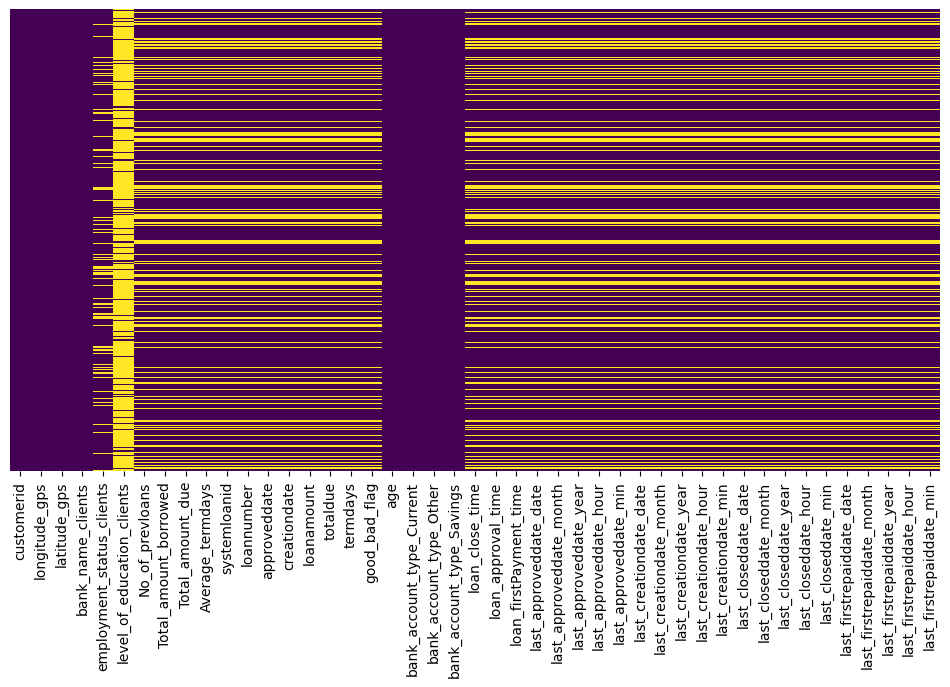

In [294]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(unencoded.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Education Level Distribution in the dataset

Below is the interpretation key

-> 'Primary':1

-> 'Secondary':2

-> 'Graduate':3

-> 'Post-Graduate':4


([<matplotlib.patches.Wedge at 0x1a72b086b40>,
 [Text(-0.6924052166335969, 0.8547368109415798, '3.0'),
  Text(0.28565030755518944, -1.0622635745395894, '2.0'),
  Text(0.9798393587802143, -0.4999148237301817, '4.0'),
  Text(1.0984196193689975, -0.058943530478473574, '1.0')],
 [Text(-0.37767557270923463, 0.4662200786954071, '71.67%'),
  Text(0.15580925866646697, -0.5794164952034123, '15.02%'),
  Text(0.534457832061935, -0.2726808129437354, '11.60%'),
  Text(0.5991379742012714, -0.03215101662462194, '1.71%')])

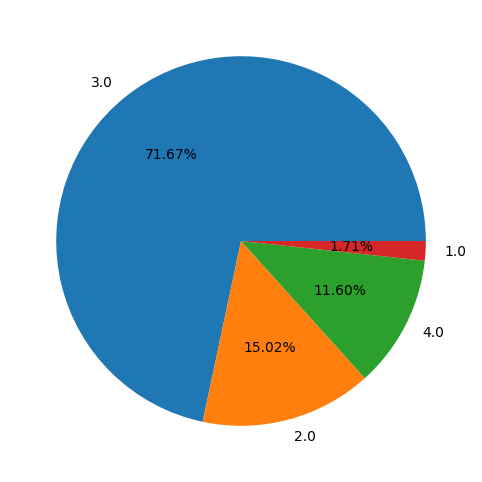

In [295]:
level_of_education_clients_names = unencoded.level_of_education_clients.value_counts().index
level_of_education_clients_values = unencoded.level_of_education_clients.value_counts().values
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
plt.pie(level_of_education_clients_values, labels=level_of_education_clients_names, autopct='%1.2f%%')

Most of the loanees are at graduate level, followed by secondary school goers, then post-graduates. 

The least are at primary school level

<Axes: xlabel='age', ylabel='totaldue'>

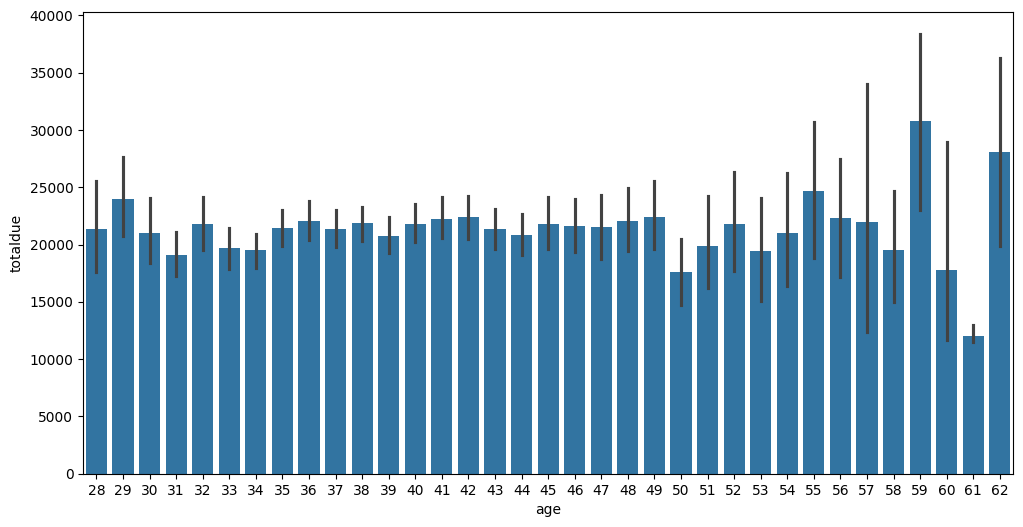

In [296]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='age', y='totaldue', data=unencoded)

Individuals who borrow the highest are aged 59.

However, the majority of the borrowers are between 28 and 58 years of age.

Less forcus should be put on primary school going customers according to this visualisation.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'GT Bank'),
  Text(1, 0, 'Sterling Bank'),
  Text(2, 0, 'Fidelity Bank'),
  Text(3, 0, 'Access Bank'),
  Text(4, 0, 'EcoBank'),
  Text(5, 0, 'FCMB'),
  Text(6, 0, 'Skye Bank'),
  Text(7, 0, 'UBA'),
  Text(8, 0, 'Zenith Bank'),
  Text(9, 0, 'Diamond Bank'),
  Text(10, 0, 'First Bank'),
  Text(11, 0, 'Union Bank'),
  Text(12, 0, 'Stanbic IBTC'),
  Text(13, 0, 'Standard Chartered'),
  Text(14, 0, 'Heritage Bank'),
  Text(15, 0, 'Keystone Bank'),
  Text(16, 0, 'Unity Bank'),
  Text(17, 0, 'Wema Bank')])

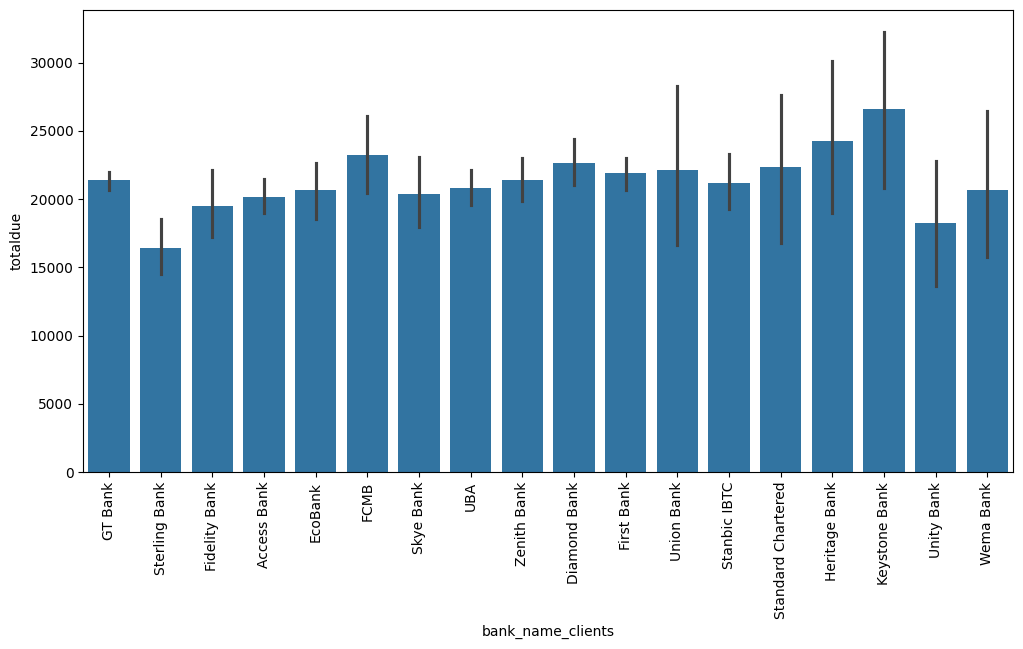

In [297]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='bank_name_clients', y='totaldue', data=unencoded)
plt.xticks(rotation=90)

Amount borrowed from each bank is fairly the same, no particular bank is most used. Most loans are from Keystone Bank though

In [298]:
unencoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4334 non-null   object 
 1   longitude_gps               4334 non-null   float64
 2   latitude_gps                4334 non-null   float64
 3   bank_name_clients           4334 non-null   object 
 4   employment_status_clients   3686 non-null   object 
 5   level_of_education_clients  586 non-null    float64
 6   No_of_prevloans             3264 non-null   float64
 7   Total_amount_borrowed       3264 non-null   float64
 8   Total_amount_due            3264 non-null   float64
 9   Average_termdays            3264 non-null   float64
 10  systemloanid                3269 non-null   float64
 11  loannumber                  3269 non-null   float64
 12  approveddate                3269 non-null   object 
 13  creationdate                3269 

In [299]:
unencoded.isnull().sum()

customerid                       0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients      648
level_of_education_clients    3748
No_of_prevloans               1070
Total_amount_borrowed         1070
Total_amount_due              1070
Average_termdays              1070
systemloanid                  1065
loannumber                    1065
approveddate                  1065
creationdate                  1065
loanamount                    1065
totaldue                      1065
termdays                      1065
good_bad_flag                 1065
age                              0
bank_account_type_Current        0
bank_account_type_Other          0
bank_account_type_Savings        0
loan_close_time               1070
loan_approval_time            1070
loan_firstPayment_time        1070
last_approveddate_date        1070
last_approveddate_month       1070
last_approveddate_year        1070
last_approveddate_ho

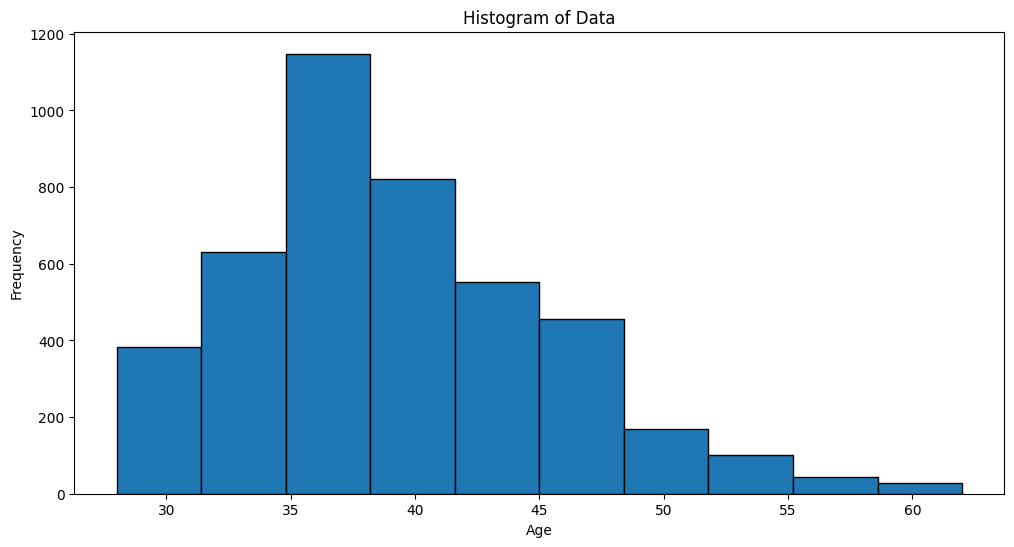

In [300]:
import matplotlib.pyplot as plt

plt.hist(unencoded['age'],edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Good bad distribution

<Axes: xlabel='good_bad_flag', ylabel='count'>

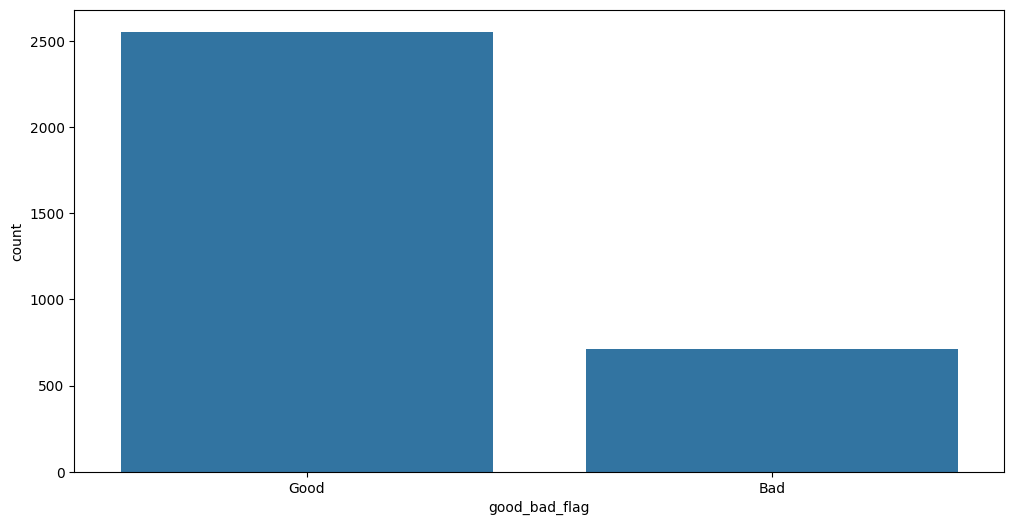

In [301]:
sns.countplot(x='good_bad_flag',data=unencoded)

In [302]:
unencoded.groupby('good_bad_flag').agg({'customerid':'nunique'})

,customerid
good_bad_flag,
Bad,713
Good,2556


In [303]:
# label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
unencoded['employment_status_clients']=labelencoder.fit_transform(unencoded['employment_status_clients'])
label_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
label_mapping

{'Contract': 0,
 'Permanent': 1,
 'Retired': 2,
 'Self-Employed': 3,
 'Student': 4,
 'Unemployed': 5,
 nan: 6}

In [304]:
unencoded['bank_name_clients']=labelencoder.fit_transform(unencoded['bank_name_clients'])
label_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
label_mapping

{'Access Bank': 0,
 'Diamond Bank': 1,
 'EcoBank': 2,
 'FCMB': 3,
 'Fidelity Bank': 4,
 'First Bank': 5,
 'GT Bank': 6,
 'Heritage Bank': 7,
 'Keystone Bank': 8,
 'Skye Bank': 9,
 'Stanbic IBTC': 10,
 'Standard Chartered': 11,
 'Sterling Bank': 12,
 'UBA': 13,
 'Union Bank': 14,
 'Unity Bank': 15,
 'Wema Bank': 16,
 'Zenith Bank': 17}

<Axes: xlabel='bank_name_clients', ylabel='count'>

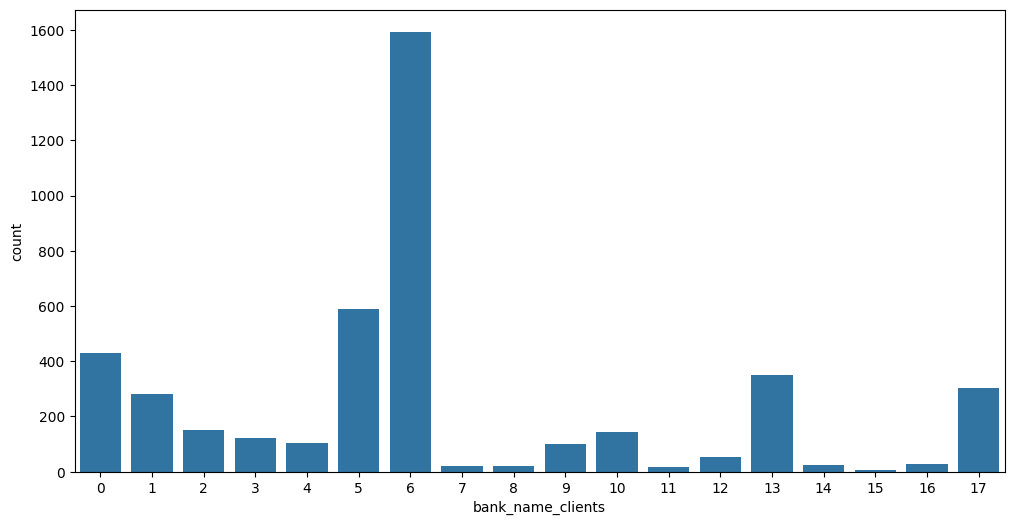

In [305]:
sns.countplot(x='bank_name_clients',data=unencoded)

<Axes: xlabel='employment_status_clients', ylabel='count'>

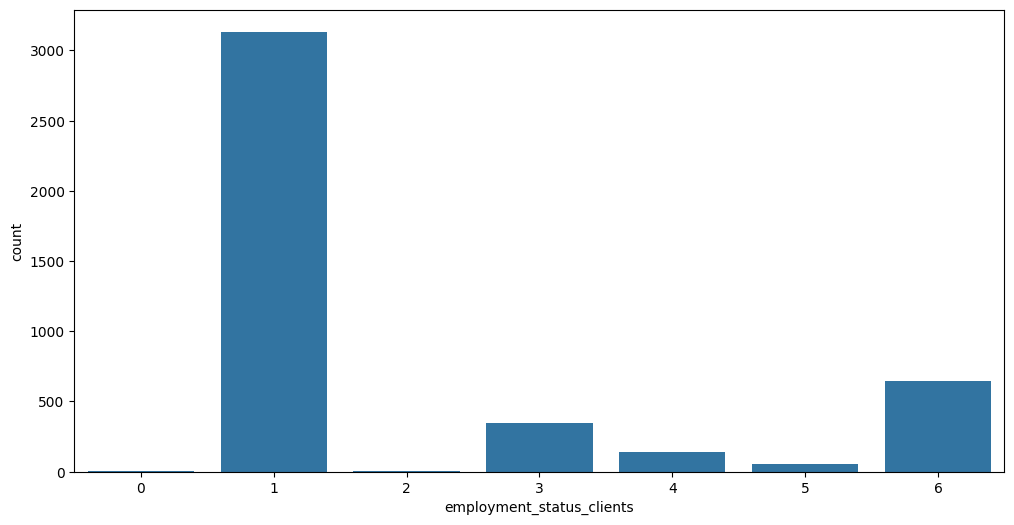

In [306]:
sns.countplot(x='employment_status_clients',data=unencoded)